In [25]:
import os
import numpy as np
import pandas as pd

from scipy import stats
from scipy.ndimage import gaussian_filter
import pingouin as pg

import matplotlib as mpl
import matplotlib.pyplot as plt  
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib_venn import venn3

import seaborn as sns
sns.set_context('talk')


from datetime import date

import random

In [2]:
# no top and right spines in all plots
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
mother_path = 'C:/LHY/Multi-modal project/'
save_path = 'C:/Users/leelab/Desktop/figures/'

### Parameter setting

In [4]:
# colors for different categories
palette = ['mediumorchid','cornflowerblue','lightcoral','gray']

cat = ['M','V','A','MV','MA','VA','MVA','None']

today = str(date.today())

### Data preparation

In [6]:
cell_path = mother_path+'analysis/result/zFR export/13-Apr-2022 (5 trials)/'

data_path = mother_path+'analysis/result/3. Item-selectivity/2023-01-09 (default)/'
df = pd.read_csv(data_path+'2023-01-09_item-selectivity.csv')

# analyze only PER neurons
#df = df[df['Region']=='PER']
df.reset_index(inplace=True)
df.insert(5,'Cat','')

for i in range(len(df)):
    cat_info = ''
    if df.loc[i,'M_sig'] == 1:
        cat_info += 'M'
    if df.loc[i,'V_sig'] == 1:
        cat_info += 'V'
    if df.loc[i,'A_sig'] == 1:
        cat_info += 'A'
    if cat_info=='':
        df.loc[i,'Cat'] = 'None'
    else:
        df.loc[i,'Cat'] = cat_info

In [7]:
os.chdir(data_path)
Binary_M = pd.read_csv('Binary_M.csv')
Binary_V = pd.read_csv('Binary_V.csv')
Binary_A = pd.read_csv('Binary_A.csv')
Binary_C = pd.read_csv('Binary_C.csv')

Cohend_M = pd.read_csv('Cohend_M.csv')
Cohend_V = pd.read_csv('Cohend_V.csv')
Cohend_A = pd.read_csv('Cohend_A.csv')
Cohend_C = pd.read_csv('Cohend_C.csv')

In [21]:
res_data_path = mother_path+'analysis/result/4. Response coding/2023-01-16/'
res_df = pd.read_csv(res_data_path+'2023-01-16_response_corr.csv')

response_cell = res_df.loc[res_df.Response_corr>0.5,'Key'].values
# remove response-selective cells
df.drop(df[df['Key'].isin(response_cell)].index,inplace=True)

### Proportions

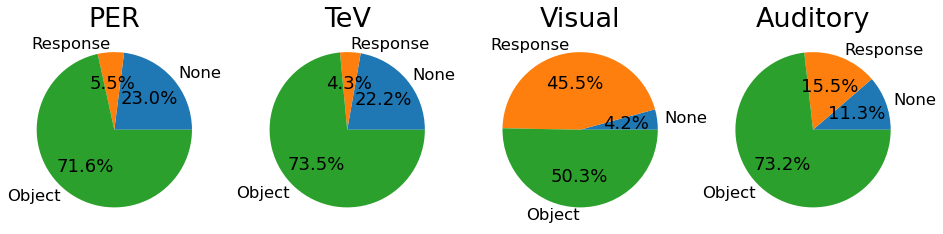

In [55]:
region = ['PER','TeV','Visual','Auditory']
fig,ax = plt.subplots(1,4,figsize=(16,6))

none_filter = (df.M_sig==0)&(df.V_sig==0)&(df.A_sig==0)
for i in range(4):
    n_none = len(df[(df.Region==region[i])&none_filter])
    n_object = len(df[df.Region==region[i]])-n_none
    n_response = len(res_df[(res_df.Region==region[i])&(res_df.Response_corr>0.5)])
    prop = [n_none, n_response, n_object]
    ax[i].pie(prop,labels=['None','Response','Object'],autopct='%.1f%%')
    ax[i].set_title(region[i],fontsize=27)
    plt.savefig(save_path+'proportion.svg')

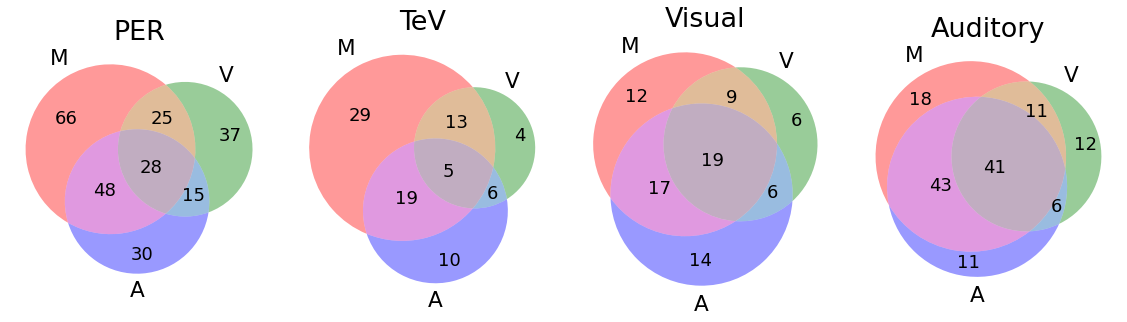

In [56]:
fig,ax = plt.subplots(1,4,figsize=(16,6))

for i in range(4):
    df_r = df[df.Region==region[i]].copy()
    v = venn3(subsets=(df_r.groupby('Cat').size()['M'],df_r.groupby('Cat').size()['V'],
                       df_r.groupby('Cat').size()['MV'],df_r.groupby('Cat').size()['A'],
                       df_r.groupby('Cat').size()['MA'],df_r.groupby('Cat').size()['VA'],
                       df_r.groupby('Cat').size()['MVA']),
              set_labels=('M','V','A'),ax=ax[i])
    ax[i].set_title(region[i],fontsize=27)

    
fig.tight_layout()
plt.savefig(save_path+'venn_allregions.svg')